## Importation des librairies

In [1]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## La lecture de dataset

### Les donnees:

In [2]:
data = np.genfromtxt('data.csv',delimiter=',',dtype=int)
#to show the number of elements in cols and rows
data.shape

(5000, 400)

### Les etiquettes:

In [3]:
labels = np.genfromtxt('labels.csv',delimiter=',',dtype=int)
labels.shape

(5000,)

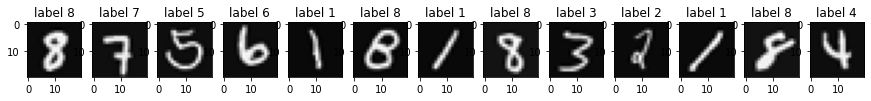

In [4]:
plt.figure(figsize=(15,8))
for i in range(13):
    ran = random.randint(data.shape[0])
    a = data[ran,:].reshape((20, 20))
    a=np.transpose(a)
    plt.subplot(1,13,i+1)
    plt.title('label '+ str(labels[ran]))
    plt.imshow(a,cmap='gray')

## Implémentation des métriques demandées

- Matrice de confusion

In [5]:
def calcule_matrice_confusion(numb):
    TP =FN =FP =TN = 0
    for i in range(number):
        if predictions[i][0] == numb and predictions[i][0] == predictions[i][1]:
            TP+=1
        elif predictions[i][1] == numb and predictions[i][0] != numb :
            FP += 1
        elif predictions[i][0] == numb and predictions[i][1] != numb :
            FN += 1
        elif predictions[i][0] != numb and predictions[i][1] != numb :
            TN += 1
    print("\tPOSITIVE\tNEGATIVE") 
    print('--------------------------------')
    print(f"POSITIVE {TP}\t\t{FN}")
    print('--------------------------------')
    print(f"NEGATIVE {FP}\t\t{TN}")
    print('--------------------------------')
    return [TP,FN,FP,TN]

- Rappel

In [6]:
def rappel(VP,FN):
    return VP/(VP+FN)

- Précision

In [7]:
def precision(VP,FP):
    return VP/(VP+FP)

- Taux de FP

In [8]:
def taux_de_FP(FP,VP):
    return FP/(FP+VP)

- Spécificité

In [9]:
def specificite():
    pass

## Classification

Train set:
Xt: [[11 11 11 ... 11 11 11]
 [16 16 16 ... 16 16 16]
 [15 15 15 ... 15 15 15]
 ...
 [10 10 10 ... 10 10 10]
 [18 18 18 ... 18 18 18]
 [13 13 13 ... 13 13 13]] 
 ----------------------
Yt: [7 2 8 ... 9 3 2] 
 ----------------------

Test set:
Xtt: [[11 11 11 ... 11 11 11]
 [14 14 14 ... 14 14 14]
 [13 13 13 ... 13 13 13]
 ...
 [11 11 11 ... 11 11 11]
 [10 10 10 ... 10 10 10]
 [12 12 12 ... 12 12 12]] 
 ----------------------
Ytt: [7 3 2 ... 3 1 2]


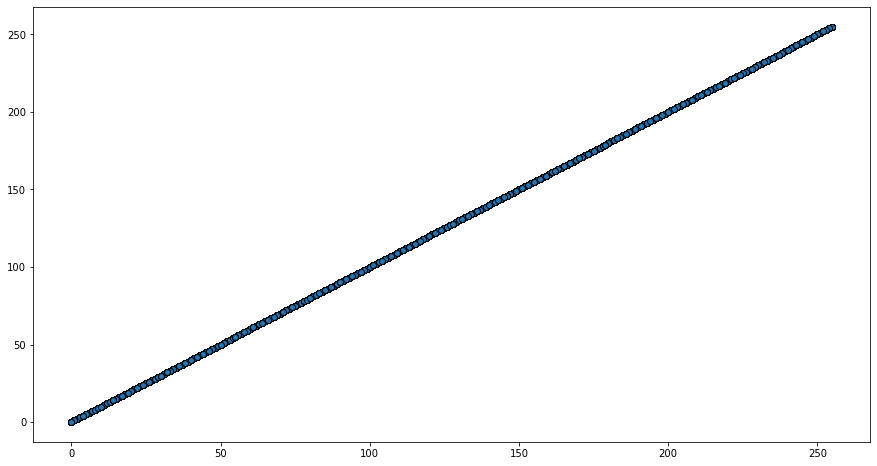

In [11]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#005f73','#0a9396','#94d2bd','#e9d8a6','#ee9b00','#ca6702','#bb3e03','#ae2012','#9b2226'])

# Definition de train set et test set:
tRatio = 2/3
ttRatio =1/3
Xt, Xtt, Yt, Ytt = train_test_split(data, labels,test_size=ttRatio )
print('Train set:')
print(f'Xt: {Xt} \n ----------------------')
print(f'Yt: {Yt} \n ----------------------\n')
print('Test set:')
print(f'Xtt: {Xtt} \n ----------------------')
print(f'Ytt: {Ytt}')

plt.figure(figsize=(15,8))
plt.scatter(data[:,], y=data[:,],cmap=cmap,edgecolor='k')
plt.show()

# Methode 0: K-Plus-Proche Voisin (KNN)

In [12]:
from collections import Counter

def euc_dist(x1, x2):
    return np.sqrt(np.sum(x1-x2)**2)

def KPP(x,Xt,Yt):
    predicted_labels = [predict(x)]
    return np.array(predicted_labels)

def predict(x):
    k=10
    #compute the distances
    distances = np.array([euc_dist(x, xt) for xt in Xt])
    #get the k nearest neighbors and labels:
    kdist = distances.argsort()[0:k]
    knear = [Yt[i] for i in kdist]
#     print(knear)
#     print(knear)
    #Illustrating the k-nearest neighbor:
    plt.figure(figsize=(20,10))
    for i in range(10):
        d= Xt[kdist[i],:].reshape((20, 20))
        d=np.transpose(d)
        plt.subplot(1,10,i+1)
        plt.title('label '+ str(Yt[kdist[i]]))
        plt.imshow(d,cmap='gray')
    #majority vote:
    majority = Counter(knear).most_common(1)
#     print(majority)
    return majority


The value that we wont to predict:


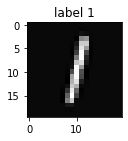

In [13]:
#test:
ran = random.randint(data.shape[0])
valToPredict = data[ran,:]
valToDraw = valToPredict.reshape((20, 20))
print("The value that we wont to predict:")
plt.figure(figsize=(20,10))
valToDraw=np.transpose(valToDraw)
plt.subplot(1,10,1)
plt.title('label '+ str(labels[ran]))
plt.imshow(valToDraw,cmap='gray')
plt.show()

The predicted values:


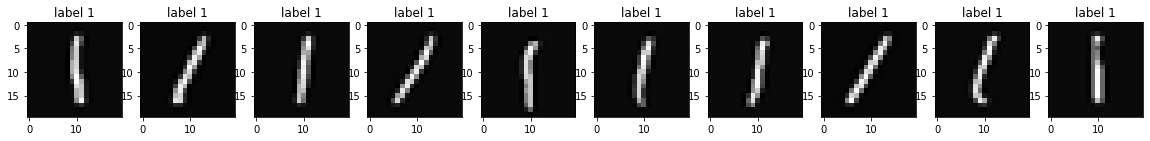

In [14]:
print("The predicted values:")
predictedVal = KPP(valToPredict,Xt,Yt)

In [15]:
print("The majority vote predicted:")
print(f'{predictedVal[0][0][0]} with {predictedVal[0][0][1]} votes')

The majority vote predicted:
1 with 10 votes


### Training Predictions using train set

# KNN variation:
to test all the train set not only one random value:

In [16]:
def KNN_testset(test_set,k):
    prediction =[]
    for i in range(len(Xt)):
        distances = np.array([euc_dist(Xt[i],xt) for xt in Xt])
        k_dist = distances.argsort()[:k]
        k_near = [Yt[i] for i in k_dist]
        majority = Counter(k_near).most_common(1)
        prediction.append((Yt[i],majority[0][0]))
    return prediction

In [17]:
predictions = KNN_testset(Xt, 10)
number = len(predictions)

## La calsse 0:

### Matrice de confusion:

In [18]:
class_0 = calcule_matrice_confusion(10)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 206		144
--------------------------------
NEGATIVE 252		2731
--------------------------------


### Rappel:

In [19]:
print(f"Le rappel: {rappel(class_0[0],class_0[1])}")

Le rappel: 0.5885714285714285


### Précision

In [20]:
print(f"La precision: {precision(class_0[0],class_0[2])}")

La precision: 0.4497816593886463


### Taux de FP

In [21]:
print(f"Le taux de faux positif: {taux_de_FP(class_0[2],class_0[1])}")

Le taux de faux positif: 0.6363636363636364


In [152]:
# courbe_ROC(class_0[0],class_0[2])

## La calsse 1:

### Matrice de confusion:

In [23]:
class_1 = calcule_matrice_confusion(1)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 271		69
--------------------------------
NEGATIVE 114		2879
--------------------------------


### Rappel:

In [24]:
print(f"Le rappel: {rappel(class_1[0],class_1[1])}")

Le rappel: 0.7970588235294118


### Précision

In [25]:
print(f"La precision: {precision(class_1[0],class_1[2])}")

La precision: 0.7038961038961039


### Taux de FP

In [26]:
print(f"Le taux de faux positif: {taux_de_FP(class_1[2],class_1[1])}")

Le taux de faux positif: 0.6229508196721312


## La calsse 2:

### Matrice de confusion:

In [27]:
class_2 = calcule_matrice_confusion(2)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 137		199
--------------------------------
NEGATIVE 162		2835
--------------------------------


### Le rappel:

In [28]:
print(f"Le rappel: {rappel(class_2[0],class_2[1])}")

Le rappel: 0.40773809523809523


### La precision:

In [29]:
print(f"La precision: {precision(class_2[0],class_2[2])}")

La precision: 0.45819397993311034


### Le taux de faux positif:

In [30]:
print(f"Le taux de faux positif: {taux_de_FP(class_2[2],class_2[1])}")

Le taux de faux positif: 0.4487534626038781


## La calsse 3:

### Matrice de confusion:

In [31]:
class_3 = calcule_matrice_confusion(3)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 129		196
--------------------------------
NEGATIVE 152		2856
--------------------------------


### Le rappel:

In [32]:
print(f"Le rappel: {rappel(class_3[0],class_3[1])}")

Le rappel: 0.39692307692307693


### La precision:

In [33]:
print(f"La precision: {precision(class_3[0],class_3[2])}")

La precision: 0.45907473309608543


### Le taux de faux positif:

In [34]:
print(f"Le taux de faux positif: {taux_de_FP(class_3[2],class_3[1])}")

Le taux de faux positif: 0.4367816091954023


## Classe 4:

### La matrice de confusion:

In [35]:
class_4 = calcule_matrice_confusion(4)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 134		195
--------------------------------
NEGATIVE 188		2816
--------------------------------


### Le rappel:

In [36]:
print(f"Le rappel: {rappel(class_4[0],class_4[1])}")

Le rappel: 0.4072948328267477


### La precision:

In [37]:
print(f"La precision: {precision(class_4[0],class_4[2])}")

La precision: 0.4161490683229814


### Le taux de faux positif:

In [38]:
print(f"Le taux de faux positif: {taux_de_FP(class_4[2],class_4[1])}")

Le taux de faux positif: 0.4908616187989556


## Classe 5:

### La matrice de confusion:

In [39]:
class_5 = calcule_matrice_confusion(5)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 140		205
--------------------------------
NEGATIVE 173		2815
--------------------------------


### Le rappel: 

In [40]:
print(f"Le rappel: {rappel(class_5[0],class_5[1])}")

Le rappel: 0.4057971014492754


### La precision:

In [41]:
print(f"La precision: {precision(class_5[0],class_5[2])}")

La precision: 0.4472843450479233


### Le taux de faux positif:

In [42]:
print(f"Le taux de faux positif: {taux_de_FP(class_5[2],class_5[1])}")

Le taux de faux positif: 0.4576719576719577


## Classe 6:

### La matrice de confusion:

In [43]:
class_6 = calcule_matrice_confusion(6)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 124		198
--------------------------------
NEGATIVE 170		2841
--------------------------------


### Le rappel: 

In [44]:
print(f"Le rappel: {rappel(class_6[0],class_6[1])}")

Le rappel: 0.38509316770186336


### La precision:

In [45]:
print(f"La precision: {precision(class_6[0],class_6[2])}")

La precision: 0.4217687074829932


### Le taux de faux positif:

In [46]:
print(f"Le taux de faux positif: {taux_de_FP(class_6[2],class_6[1])}")

Le taux de faux positif: 0.46195652173913043


## Classe 7:

### Matrice de confusion:

In [47]:
class_7 = calcule_matrice_confusion(7)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 140		176
--------------------------------
NEGATIVE 166		2851
--------------------------------


### Le rappel: 

In [48]:
print(f"Le rappel: {rappel(class_7[0],class_7[1])}")

Le rappel: 0.4430379746835443


### La precision:

In [49]:
print(f"La precision: {precision(class_7[0],class_7[2])}")

La precision: 0.45751633986928103


### Le taux de faux positif:

In [50]:
print(f"Le taux de faux positif: {taux_de_FP(class_7[2],class_7[1])}")

Le taux de faux positif: 0.4853801169590643


## Classe 8:

### Matrice de confusion:

In [51]:
class_8 = calcule_matrice_confusion(8)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 115		208
--------------------------------
NEGATIVE 155		2855
--------------------------------


### Le rappel: 

In [52]:
print(f"Le rappel: {rappel(class_8[0],class_8[1])}")

Le rappel: 0.3560371517027864


### La precision:

In [53]:
print(f"La precision: {precision(class_8[0],class_8[2])}")

La precision: 0.42592592592592593


### Le taux de faux positif:

In [54]:
print(f"Le taux de faux positif: {taux_de_FP(class_8[2],class_8[1])}")

Le taux de faux positif: 0.42699724517906334


## Classe 9:

### Matrice de confusion:

In [55]:
class_9 = calcule_matrice_confusion(9)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 171		176
--------------------------------
NEGATIVE 234		2752
--------------------------------


### Le rappel: 

In [56]:
print(f"Le rappel: {rappel(class_9[0],class_9[1])}")

Le rappel: 0.49279538904899134


### La precision:

In [57]:
print(f"La precision: {precision(class_9[0],class_9[2])}")

La precision: 0.4222222222222222


### Le taux de faux positif:

In [58]:
print(f"Le taux de faux positif: {taux_de_FP(class_9[2],class_9[1])}")

Le taux de faux positif: 0.5707317073170731


# Méthode 1: MVS

In [241]:
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

#Créer le modèle
model= svm.SVC(kernel='linear',probability=True) 
# entrainement 
model.fit(Xt, Yt)
# Prediction
y_pred = model.predict(Xtt)

In [277]:
xtt_len = len(Xtt)
xtt_labels =  np.array([Ytt[i] for i in range(xtt_len)])
predictions =[list(a) for a in zip(xtt_labels, y_pred)]

In [61]:
number = len(predictions)

## Courbe ROC:

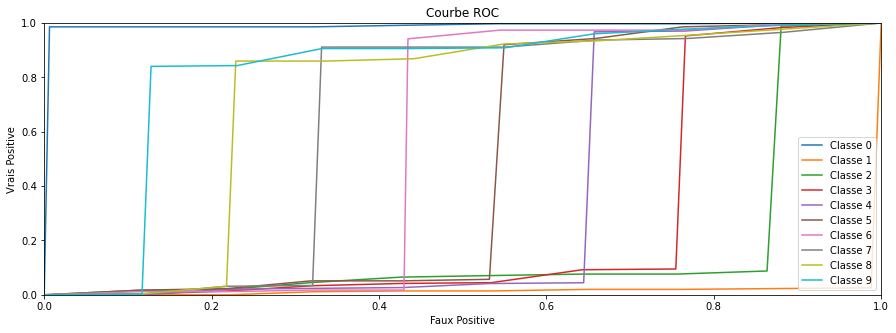

In [278]:
fpr10, tpr10, _ = roc_curve(Ytt, y_pred, pos_label=10)
fpr1, tpr1, _ = roc_curve(Ytt, y_pred, pos_label=1)
fpr2, tpr2, _ = roc_curve(Ytt, y_pred, pos_label=2)
fpr3, tpr3, _ = roc_curve(Ytt, y_pred, pos_label=3)
fpr4, tpr4, _ = roc_curve(Ytt, y_pred, pos_label=4)
fpr5, tpr5, _ = roc_curve(Ytt, y_pred, pos_label=5)
fpr6, tpr6, _ = roc_curve(Ytt, y_pred, pos_label=6)
fpr7, tpr7, _ = roc_curve(Ytt, y_pred, pos_label=7)
fpr8, tpr8, _ = roc_curve(Ytt, y_pred, pos_label=8)
fpr9, tpr9, _ = roc_curve(Ytt, y_pred, pos_label=9)

plt.figure(figsize=(15,5))
plt.plot(fpr10,tpr10,label="Classe 0")
plt.plot(fpr1,tpr1,label="Classe 1")
plt.plot(fpr2,tpr2,label="Classe 2")
plt.plot(fpr3,tpr3,label="Classe 3")
plt.plot(fpr4,tpr4,label="Classe 4")
plt.plot(fpr5,tpr5,label="Classe 5")
plt.plot(fpr6,tpr6,label="Classe 6")
plt.plot(fpr7,tpr7,label="Classe 7")
plt.plot(fpr8,tpr8,label="Classe 8")
plt.plot(fpr9,tpr9,label="Classe 9")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("Faux Positive")
plt.ylabel("Vrais Positive")
plt.title("Courbe ROC")
plt.legend(loc="lower right")
plt.show()

## Classe 0:

### Matrice de confusion:

In [62]:
class_0_MVS = calcule_matrice_confusion(10)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 148		2
--------------------------------
NEGATIVE 3		1514
--------------------------------


### Rappel:

In [63]:
print(f"Le rappel: {rappel(class_0_MVS[0],class_0_MVS[1])}")

Le rappel: 0.9866666666666667


### Précision

In [64]:
print(f"La precision: {precision(class_0_MVS[0],class_0_MVS[2])}")

La precision: 0.9801324503311258


### Taux de FP

In [65]:
print(f"Le taux de faux positif: {taux_de_FP(class_0_MVS[2],class_0_MVS[1])}")

Le taux de faux positif: 0.6


## Classe 1:

### Matrice de confusion:

In [264]:
class_1_MVS = calcule_matrice_confusion(1)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 159		5
--------------------------------
NEGATIVE 16		1487
--------------------------------


### Rappel:

In [265]:
print(f"Le rappel: {rappel(class_1_MVS[0],class_1_MVS[1])}")

Le rappel: 0.9695121951219512


### Précision

In [68]:
print(f"La precision: {precision(class_1_MVS[0],class_1_MVS[2])}")

La precision: 0.9408284023668639


### Taux de FP

In [69]:
print(f"Le taux de faux positif: {taux_de_FP(class_1_MVS[2],class_1_MVS[1])}")

Le taux de faux positif: 0.9090909090909091


## Classe 2:

### Matrice de confusion:

In [70]:
class_2_MVS = calcule_matrice_confusion(2)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 148		16
--------------------------------
NEGATIVE 14		1489
--------------------------------


### Rappel:

In [71]:
print(f"Le rappel: {rappel(class_2_MVS[0],class_2_MVS[1])}")

Le rappel: 0.9024390243902439


### Précision

In [72]:
print(f"La precision: {precision(class_2_MVS[0],class_2_MVS[2])}")

La precision: 0.9135802469135802


### Taux de FP

In [73]:
print(f"Le taux de faux positif: {taux_de_FP(class_2_MVS[2],class_2_MVS[1])}")

Le taux de faux positif: 0.4666666666666667


## Classe 3:

### Matrice de confusion:

In [74]:
class_3_MVS = calcule_matrice_confusion(3)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 154		21
--------------------------------
NEGATIVE 28		1464
--------------------------------


### Rappel:

In [75]:
print(f"Le rappel: {rappel(class_3_MVS[0],class_3_MVS[1])}")

Le rappel: 0.88


### Précision

In [76]:
print(f"La precision: {precision(class_3_MVS[0],class_3_MVS[2])}")

La precision: 0.8461538461538461


### Taux de FP

In [77]:
print(f"Le taux de faux positif: {taux_de_FP(class_3_MVS[2],class_3_MVS[1])}")

Le taux de faux positif: 0.5714285714285714


## Classe 4:

### Matrice de confusion:

In [78]:
class_4_MVS = calcule_matrice_confusion(4)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 165		6
--------------------------------
NEGATIVE 18		1478
--------------------------------


### Rappel:

In [79]:
print(f"Le rappel: {rappel(class_4_MVS[0],class_4_MVS[1])}")

Le rappel: 0.9649122807017544


### Précision

In [80]:
print(f"La precision: {precision(class_4_MVS[0],class_4_MVS[2])}")

La precision: 0.9016393442622951


### Taux de FP

In [81]:
print(f"Le taux de faux positif: {taux_de_FP(class_4_MVS[2],class_4_MVS[1])}")

Le taux de faux positif: 0.75


## Classe 5:

### Matrice de confusion:

In [82]:
class_5_MVS = calcule_matrice_confusion(5)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 140		15
--------------------------------
NEGATIVE 21		1491
--------------------------------


### Rappel:

In [83]:
print(f"Le rappel: {rappel(class_5_MVS[0],class_5_MVS[1])}")

Le rappel: 0.9032258064516129


### Précision

In [84]:
print(f"La precision: {precision(class_5_MVS[0],class_5_MVS[2])}")

La precision: 0.8695652173913043


### Taux de FP

In [85]:
print(f"Le taux de faux positif: {taux_de_FP(class_5_MVS[2],class_5_MVS[1])}")

Le taux de faux positif: 0.5833333333333334


## Classe 6:

### Matrice de confusion:

In [86]:
class_6_MVS = calcule_matrice_confusion(6)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 169		9
--------------------------------
NEGATIVE 11		1478
--------------------------------


### Rappel:

In [87]:
print(f"Le rappel: {rappel(class_6_MVS[0],class_6_MVS[1])}")

Le rappel: 0.949438202247191


### Précision

In [88]:
print(f"La precision: {precision(class_6_MVS[0],class_6_MVS[2])}")

La precision: 0.9388888888888889


### Taux de FP

In [89]:
print(f"Le taux de faux positif: {taux_de_FP(class_6_MVS[2],class_6_MVS[1])}")

Le taux de faux positif: 0.55


## Classe 7:

### Matrice de confusion:

In [90]:
class_7_MVS = calcule_matrice_confusion(7)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 158		26
--------------------------------
NEGATIVE 12		1471
--------------------------------


### Rappel:

In [91]:
print(f"Le rappel: {rappel(class_7_MVS[0],class_7_MVS[1])}")

Le rappel: 0.8586956521739131


### Précision

In [92]:
print(f"La precision: {precision(class_7_MVS[0],class_7_MVS[2])}")

La precision: 0.9294117647058824


### Taux de FP

In [93]:
print(f"Le taux de faux positif: {taux_de_FP(class_7_MVS[2],class_7_MVS[1])}")

Le taux de faux positif: 0.3157894736842105


## Classe 8:

### Matrice de confusion:

In [94]:
class_8_MVS = calcule_matrice_confusion(8)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 148		29
--------------------------------
NEGATIVE 15		1475
--------------------------------


### Rappel:

In [95]:
print(f"Le rappel: {rappel(class_8_MVS[0],class_8_MVS[1])}")

Le rappel: 0.8361581920903954


### Précision

In [96]:
print(f"La precision: {precision(class_8_MVS[0],class_8_MVS[2])}")

La precision: 0.9079754601226994


### Taux de FP

In [97]:
print(f"Le taux de faux positif: {taux_de_FP(class_8_MVS[2],class_8_MVS[1])}")

Le taux de faux positif: 0.3409090909090909


## Classe 9:

### Matrice de confusion:

In [98]:
class_9_MVS = calcule_matrice_confusion(9)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 132		21
--------------------------------
NEGATIVE 14		1500
--------------------------------


### Rappel:

In [99]:
print(f"Le rappel: {rappel(class_9_MVS[0],class_9_MVS[1])}")

Le rappel: 0.8627450980392157


### Précision

In [100]:
print(f"La precision: {precision(class_9_MVS[0],class_9_MVS[2])}")

La precision: 0.9041095890410958


### Taux de FP

In [101]:
print(f"Le taux de faux positif: {taux_de_FP(class_9_MVS[2],class_9_MVS[1])}")

Le taux de faux positif: 0.4


# Méthode 2: Arbres de décision

In [280]:
from sklearn.tree import DecisionTreeClassifier
# Créer le modèle
model_arbre = DecisionTreeClassifier()
# Entrainer le modèle
model_arbre = model_arbre.fit(Xt, Yt)
# Prediction
y_pred_arbre = model_arbre.predict(Xtt)

In [281]:
xtt_len = len(Xtt)
xtt_labels_labels =  np.array([Ytt[i] for i in range(xtt_len)])
predictions =[list(a) for a in zip(xtt_labels_labels, y_pred_arbre)]

In [282]:
number = len(predictions)

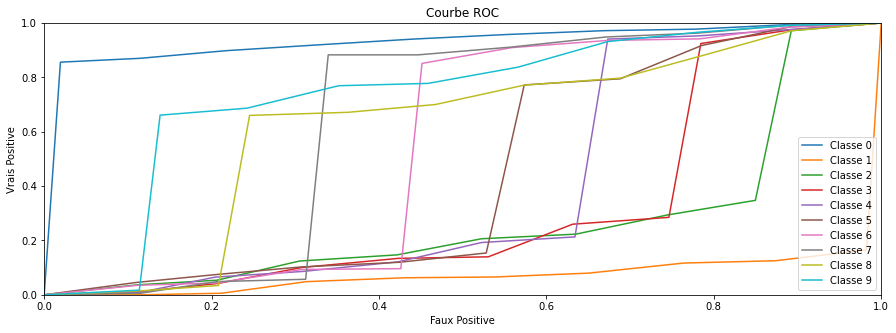

In [283]:
fpr10, tpr10, _ = roc_curve(Ytt, y_pred_arbre, pos_label=10)
fpr1, tpr1, _ = roc_curve(Ytt, y_pred_arbre, pos_label=1)
fpr2, tpr2, _ = roc_curve(Ytt, y_pred_arbre, pos_label=2)
fpr3, tpr3, _ = roc_curve(Ytt, y_pred_arbre, pos_label=3)
fpr4, tpr4, _ = roc_curve(Ytt, y_pred_arbre, pos_label=4)
fpr5, tpr5, _ = roc_curve(Ytt, y_pred_arbre, pos_label=5)
fpr6, tpr6, _ = roc_curve(Ytt, y_pred_arbre, pos_label=6)
fpr7, tpr7, _ = roc_curve(Ytt, y_pred_arbre, pos_label=7)
fpr8, tpr8, _ = roc_curve(Ytt, y_pred_arbre, pos_label=8)
fpr9, tpr9, _ = roc_curve(Ytt, y_pred_arbre, pos_label=9)

plt.figure(figsize=(15,5))
plt.plot(fpr10,tpr10,label="Classe 0")
plt.plot(fpr1,tpr1,label="Classe 1")
plt.plot(fpr2,tpr2,label="Classe 2")
plt.plot(fpr3,tpr3,label="Classe 3")
plt.plot(fpr4,tpr4,label="Classe 4")
plt.plot(fpr5,tpr5,label="Classe 5")
plt.plot(fpr6,tpr6,label="Classe 6")
plt.plot(fpr7,tpr7,label="Classe 7")
plt.plot(fpr8,tpr8,label="Classe 8")
plt.plot(fpr9,tpr9,label="Classe 9")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("Faux Positive")
plt.ylabel("Vrais Positive")
plt.title("Courbe ROC")
plt.legend(loc="lower right")
plt.show()

## Classe 0:

### Matrice de confusion:

In [105]:
class_0_arbre = calcule_matrice_confusion(10)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 131		19
--------------------------------
NEGATIVE 18		1499
--------------------------------


### Rappel:

In [106]:
print(f"Le rappel: {rappel(class_0_arbre[0],class_0_arbre[1])}")

Le rappel: 0.8733333333333333


### Précision

In [107]:
print(f"La precision: {precision(class_0_arbre[0],class_0_arbre[2])}")

La precision: 0.8791946308724832


### Taux de FP

In [108]:
print(f"Le taux de faux positif: {taux_de_FP(class_0_arbre[2],class_0_arbre[1])}")

Le taux de faux positif: 0.4864864864864865


## Classe 1:

### Matrice de confusion:

In [109]:
class_1_arbre = calcule_matrice_confusion(1)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 144		16
--------------------------------
NEGATIVE 19		1488
--------------------------------


### Rappel:

In [110]:
print(f"Le rappel: {rappel(class_1_arbre[0],class_1_arbre[1])}")

Le rappel: 0.9


### Précision

In [111]:
print(f"La precision: {precision(class_1_arbre[0],class_1_arbre[2])}")

La precision: 0.8834355828220859


### Taux de FP

In [112]:
print(f"Le taux de faux positif: {taux_de_FP(class_1_arbre[2],class_1_arbre[1])}")

Le taux de faux positif: 0.5428571428571428


## Classe 2:

### Matrice de confusion:

In [113]:
class_2_arbre = calcule_matrice_confusion(2)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 119		45
--------------------------------
NEGATIVE 48		1455
--------------------------------


### Rappel:

In [114]:
print(f"Le rappel: {rappel(class_2_arbre[0],class_2_arbre[1])}")

Le rappel: 0.725609756097561


### Précision

In [115]:
print(f"La precision: {precision(class_2_arbre[0],class_2_arbre[2])}")

La precision: 0.7125748502994012


### Taux de FP

In [116]:
print(f"Le taux de faux positif: {taux_de_FP(class_2_arbre[2],class_2_arbre[1])}")

Le taux de faux positif: 0.5161290322580645


## Classe 3:

### Matrice de confusion:

In [117]:
class_3_arbre = calcule_matrice_confusion(3)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 123		52
--------------------------------
NEGATIVE 56		1436
--------------------------------


### Rappel:

In [118]:
print(f"Le rappel: {rappel(class_3_arbre[0],class_3_arbre[1])}")

Le rappel: 0.7028571428571428


### Précision

In [119]:
print(f"La precision: {precision(class_3_arbre[0],class_3_arbre[2])}")

La precision: 0.6871508379888268


### Taux de FP

In [120]:
print(f"Le taux de faux positif: {taux_de_FP(class_3_arbre[2],class_3_arbre[1])}")

Le taux de faux positif: 0.5185185185185185


## Classe 4:

### Matrice de confusion:

In [121]:
class_4_arbre = calcule_matrice_confusion(4)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 134		37
--------------------------------
NEGATIVE 52		1444
--------------------------------


### Rappel:

In [122]:
print(f"Le rappel: {rappel(class_4_arbre[0],class_4_arbre[1])}")

Le rappel: 0.783625730994152


### Précision

In [123]:
print(f"La precision: {precision(class_4_arbre[0],class_4_arbre[2])}")

La precision: 0.7204301075268817


### Taux de FP

In [124]:
print(f"Le taux de faux positif: {taux_de_FP(class_4_arbre[2],class_4_arbre[1])}")

Le taux de faux positif: 0.5842696629213483


## Classe 5:

### Matrice de confusion:

In [125]:
class_5_arbre = calcule_matrice_confusion(5)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 107		48
--------------------------------
NEGATIVE 41		1471
--------------------------------


### Rappel:

In [126]:
print(f"Le rappel: {rappel(class_5_arbre[0],class_5_arbre[1])}")

Le rappel: 0.6903225806451613


### Précision

In [127]:
print(f"La precision: {precision(class_5_arbre[0],class_5_arbre[2])}")

La precision: 0.722972972972973


### Taux de FP

In [128]:
print(f"Le taux de faux positif: {taux_de_FP(class_5_arbre[2],class_5_arbre[1])}")

Le taux de faux positif: 0.4606741573033708


## Classe 6:

### Matrice de confusion:

In [129]:
class_6_arbre = calcule_matrice_confusion(6)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 137		41
--------------------------------
NEGATIVE 37		1452
--------------------------------


### Rappel:

In [130]:
print(f"Le rappel: {rappel(class_6_arbre[0],class_6_arbre[1])}")

Le rappel: 0.7696629213483146


### Précision

In [131]:
print(f"La precision: {precision(class_6_arbre[0],class_6_arbre[2])}")

La precision: 0.7873563218390804


### Taux de FP

In [132]:
print(f"Le taux de faux positif: {taux_de_FP(class_6_arbre[2],class_6_arbre[1])}")

Le taux de faux positif: 0.47435897435897434


## Classe 7:

### Matrice de confusion:

In [133]:
class_7_arbre = calcule_matrice_confusion(7)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 144		40
--------------------------------
NEGATIVE 26		1457
--------------------------------


### Rappel:

In [134]:
print(f"Le rappel: {rappel(class_7_arbre[0],class_7_arbre[1])}")

Le rappel: 0.782608695652174


### Précision

In [135]:
print(f"La precision: {precision(class_7_arbre[0],class_7_arbre[2])}")

La precision: 0.8470588235294118


### Taux de FP

In [136]:
print(f"Le taux de faux positif: {taux_de_FP(class_7_arbre[2],class_7_arbre[1])}")

Le taux de faux positif: 0.3939393939393939


## Classe 8:

### Matrice de confusion:

In [137]:
class_8_arbre = calcule_matrice_confusion(8)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 123		54
--------------------------------
NEGATIVE 45		1445
--------------------------------


### Rappel:

In [138]:
print(f"Le rappel: {rappel(class_8_arbre[0],class_8_arbre[1])}")

Le rappel: 0.6949152542372882


### Précision

In [139]:
print(f"La precision: {precision(class_8_arbre[0],class_8_arbre[2])}")

La precision: 0.7321428571428571


### Taux de FP

In [140]:
print(f"Le taux de faux positif: {taux_de_FP(class_8_arbre[2],class_8_arbre[1])}")

Le taux de faux positif: 0.45454545454545453


## Classe 9:

### Matrice de confusion:

In [141]:
class_9_arbre = calcule_matrice_confusion(9)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 119		34
--------------------------------
NEGATIVE 44		1470
--------------------------------


### Rappel:

In [142]:
print(f"Le rappel: {rappel(class_9_arbre[0],class_9_arbre[1])}")

Le rappel: 0.7777777777777778


### Précision

In [143]:
print(f"La precision: {precision(class_9_arbre[0],class_9_arbre[2])}")

La precision: 0.7300613496932515


### Taux de FP

In [144]:
print(f"Le taux de faux positif: {taux_de_FP(class_9_arbre[2],class_9_arbre[1])}")

Le taux de faux positif: 0.5641025641025641


# Méthode 3: RN 
Réseaux de neurones Perceptron

In [284]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(25),max_iter=100000)
Xt, Xtt, Yt, Ytt = train_test_split(data, labels, random_state=0, test_size=0.7)
model.fit(Xt, Yt)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=25, max_iter=100000, solver='sgd')

In [285]:
y_pred_RN = model.predict(Xtt)

In [286]:
xtt_len_RN = len(Xtt)
xtt_labels_RN =  np.array([Ytt[i] for i in range(xtt_len)])
predictions =[list(a) for a in zip(xtt_labels_RN, y_pred_RN)]

In [287]:
number = len(predictions)

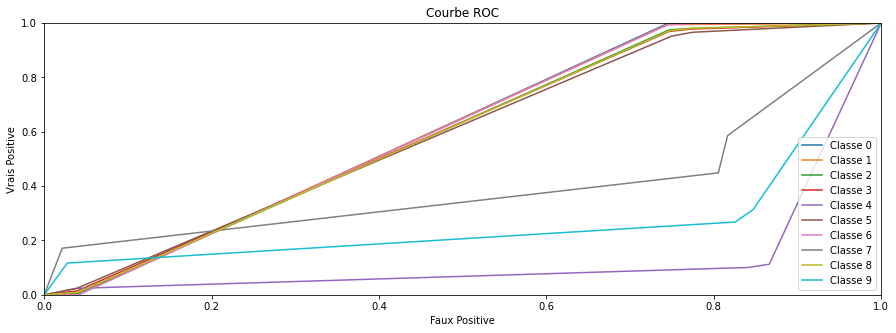

In [288]:
fpr10, tpr10, _ = roc_curve(Ytt, y_pred_RN, pos_label=10)
fpr1, tpr1, _ = roc_curve(Ytt, y_pred_RN, pos_label=1)
fpr2, tpr2, _ = roc_curve(Ytt, y_pred_RN, pos_label=2)
fpr3, tpr3, _ = roc_curve(Ytt, y_pred_RN, pos_label=3)
fpr4, tpr4, _ = roc_curve(Ytt, y_pred_RN, pos_label=4)
fpr5, tpr5, _ = roc_curve(Ytt, y_pred_RN, pos_label=5)
fpr6, tpr6, _ = roc_curve(Ytt, y_pred_RN, pos_label=6)
fpr7, tpr7, _ = roc_curve(Ytt, y_pred_RN, pos_label=7)
fpr8, tpr8, _ = roc_curve(Ytt, y_pred_RN, pos_label=8)
fpr9, tpr9, _ = roc_curve(Ytt, y_pred_RN, pos_label=9)

plt.figure(figsize=(15,5))
plt.plot(fpr10,tpr10,label="Classe 0")
plt.plot(fpr1,tpr1,label="Classe 1")
plt.plot(fpr2,tpr2,label="Classe 2")
plt.plot(fpr3,tpr3,label="Classe 3")
plt.plot(fpr4,tpr4,label="Classe 4")
plt.plot(fpr5,tpr5,label="Classe 5")
plt.plot(fpr6,tpr6,label="Classe 6")
plt.plot(fpr7,tpr7,label="Classe 7")
plt.plot(fpr8,tpr8,label="Classe 8")
plt.plot(fpr9,tpr9,label="Classe 9")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("Faux Positive")
plt.ylabel("Vrais Positive")
plt.title("Courbe ROC")
plt.legend(loc="lower right")
plt.show()

## Classe 0:

### Matrice de confusion:

In [289]:
class_0_RN = calcule_matrice_confusion(10)

	POSITIVE	NEGATIVE
--------------------------------
POSITIVE 0		354
--------------------------------
NEGATIVE 0		3146
--------------------------------


### Rappel:

In [150]:
print(f"Le rappel: {rappel(class_0_RN[0],class_0_RN[1])}")

Le rappel: 0.0


### Précision

In [151]:
print(f"La precision: {precision(class_0_RN[0],class_0_RN[2])}")

ZeroDivisionError: division by zero

### Taux de FP

In [ ]:
print(f"Le taux de faux positif: {taux_de_FP(class_0_RN[2],class_0_RN[1])}")

## Classe 1:

### Matrice de confusion:

In [ ]:
class_1_RN = calcule_matrice_confusion(1)

### Rappel:

In [ ]:
print(f"Le rappel: {rappel(class_1_RN[0],class_1_RN[1])}")

### Précision

In [ ]:
print(f"La precision: {precision(class_1_RN[0],class_1_RN[2])}")

### Taux de FP

In [ ]:
print(f"Le taux de faux positif: {taux_de_FP(class_1_RN[2],class_1_RN[1])}")

## Classe 2:

### Matrice de confusion:

In [ ]:
class_2_RN = calcule_matrice_confusion(2)

### Rappel:

In [ ]:
print(f"Le rappel: {rappel(class_2_RN[0],class_2_RN[1])}")

### Précision

In [ ]:
print(f"La precision: {precision(class_2_RN[0],class_2_RN[2])}")

### Taux de FP

In [ ]:
print(f"Le taux de faux positif: {taux_de_FP(class_2_RN[2],class_2_RN[1])}")

## Classe 3:

### Matrice de confusion:

In [ ]:
class_3_RN = calcule_matrice_confusion(3)

### Rappel:

In [ ]:
print(f"Le rappel: {rappel(class_3_RN[0],class_3_RN[1])}")

### Précision

In [ ]:
print(f"La precision: {precision(class_3_RN[0],class_3_RN[2])}")

### Taux de FP

In [ ]:
print(f"Le taux de faux positif: {taux_de_FP(class_3_RN[2],class_3_RN[1])}")

## Classe 4:

### Matrice de confusion:

In [ ]:
class_4_RN = calcule_matrice_confusion(4)

### Rappel:

In [ ]:
print(f"Le rappel: {rappel(class_4_RN[0],class_4_RN[1])}")

### Précision

In [ ]:
print(f"La precision: {precision(class_4_RN[0],class_4_RN[2])}")

### Taux de FP

In [ ]:
print(f"Le taux de faux positif: {taux_de_FP(class_4_RN[2],class_4_RN[1])}")

## Classe 5:

### Matrice de confusion:

In [ ]:
class_5_RN = calcule_matrice_confusion(5)

### Rappel:

In [ ]:
print(f"Le rappel: {rappel(class_5_RN[0],class_5_RN[1])}")

### Précision

In [ ]:
print(f"La precision: {precision(class_5_RN[0],class_5_RN[2])}")

### Taux de FP

In [ ]:
print(f"Le taux de faux positif: {taux_de_FP(class_5_RN[2],class_5_RN[1])}")

## Classe 6:

### Matrice de confusion:

In [ ]:
class_6_RN = calcule_matrice_confusion(6)

### Rappel:

In [ ]:
print(f"Le rappel: {rappel(class_6_RN[0],class_6_RN[1])}")

### Précision

In [ ]:
print(f"La precision: {precision(class_6_RN[0],class_6_RN[2])}")

### Taux de FP

In [ ]:
print(f"Le taux de faux positif: {taux_de_FP(class_6_RN[2],class_6_RN[1])}")

## Classe 7:

### Matrice de confusion:

In [ ]:
class_7_RN = calcule_matrice_confusion(7)

### Rappel:

In [ ]:
print(f"Le rappel: {rappel(class_7_RN[0],class_7_RN[1])}")

### Précision

In [ ]:
print(f"La precision: {precision(class_7_RN[0],class_7_RN[2])}")

### Taux de FP

In [ ]:
print(f"Le taux de faux positif: {taux_de_FP(class_7_RN[2],class_7_RN[1])}")

## Classe 8:

### Matrice de confusion:

In [ ]:
class_8_RN = calcule_matrice_confusion(8)

### Rappel:

In [ ]:
print(f"Le rappel: {rappel(class_8_RN[0],class_8_RN[1])}")

### Précision

In [ ]:
print(f"La precision: {precision(class_8_RN[0],class_8_RN[2])}")

### Taux de FP

In [ ]:
print(f"Le taux de faux positif: {taux_de_FP(class_8_RN[2],class_8_RN[1])}")

## Classe 9:

### Matrice de confusion:

In [ ]:
class_9_RN = calcule_matrice_confusion(9)

### Rappel:

In [ ]:
print(f"Le rappel: {rappel(class_9_RN[0],class_9_RN[1])}")

### Précision

In [ ]:
print(f"La precision: {precision(class_9_RN[0],class_9_RN[2])}")

### Taux de FP

In [ ]:
print(f"Le taux de faux positif: {taux_de_FP(class_9_RN[2],class_9_RN[1])}")